## DatafestAfrica ML Hackathon

In [14]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = 'darkgrid')
sns.set_context('paper')
base_color = sns.color_palette()[0]

%matplotlib inline

## Table of Content( to be worked on later)
Abstract

wrangling

eda

## Abstract
 The aim of this project is to train a Machine Learning model to help a Financial Industry predict who is likely to complete an E-process application.

## Preliminary  Wrangling

In [15]:
# downloading the datasets programmatically (from Zion)
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

We will be performing our wrangling on the train dataset.

### Assessing

In [16]:
# creating a simple function to return basic information on the dataset
def info(df):
    print(df.shape),
    print('*' *40),
    print(df.info())
    print('*' *40)
    print(df.nunique())
    
info(train)
train.sample(5)

(12516, 21)
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12516 entries, 0 to 12515
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entry_id              12516 non-null  int64  
 1   age                   12516 non-null  int64  
 2   pay_schedule          12516 non-null  object 
 3   home_owner            12516 non-null  int64  
 4   income                12516 non-null  int64  
 5   months_employed       12516 non-null  int64  
 6   years_employed        12516 non-null  int64  
 7   current_address_year  12516 non-null  int64  
 8   personal_account_m    12516 non-null  int64  
 9   personal_account_y    12516 non-null  int64  
 10  has_debt              12516 non-null  int64  
 11  amount_requested      12516 non-null  int64  
 12  risk_score            12516 non-null  int64  
 13  risk_score_2          12516 non-null  float64
 14  risk_score_3     

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
4175,2849543,50,weekly,1,3710,0,4,1,1,3,...,900,62500,0.773731,0.884539,0.644390,0.794508,0.725098,0.425098,3,1
4174,4203470,58,bi-weekly,1,3515,0,2,2,1,3,...,500,63150,0.692906,0.951719,0.791394,0.769415,0.767963,0.767963,9,0
268,1115491,32,bi-weekly,1,2150,0,4,5,2,4,...,500,45350,0.678445,0.875494,0.321949,0.388685,0.520434,0.320434,4,1
7059,8813284,44,weekly,1,2600,0,5,6,0,0,...,1200,60600,0.673059,0.935065,0.567890,0.773975,0.580461,0.680461,11,1
767,2525287,43,semi-monthly,0,4085,0,3,1,3,2,...,900,53300,0.554636,0.911340,0.576491,0.525849,0.276971,0.576971,12,1


In [17]:
# creating a dataframe to house key numerical variables in the dataset 
num_vars = pd.DataFrame()
num_vars['age'] = train['age']
num_vars['income'] = train['income']
num_vars['amount_requested'] = train['amount_requested']
num_vars['risk_score'] = train['risk_score']

In [18]:
# this returns summary statistics on key numerical variables in the dataset.
num_vars.describe()

,age,income,amount_requested,risk_score
count,12516.000000,12516.000000,12516.000000,12516.000000
mean,43.026766,3654.110658,950.251518,61133.401246
std,11.865891,1508.072163,706.915146,15396.809340
min,18.000000,905.000000,350.000000,2100.000000
25%,34.000000,2575.000000,600.000000,49450.000000
50%,42.000000,3255.000000,700.000000,61200.000000
75%,51.000000,4661.250000,1100.000000,72750.000000
max,96.000000,9985.000000,10200.000000,99750.000000


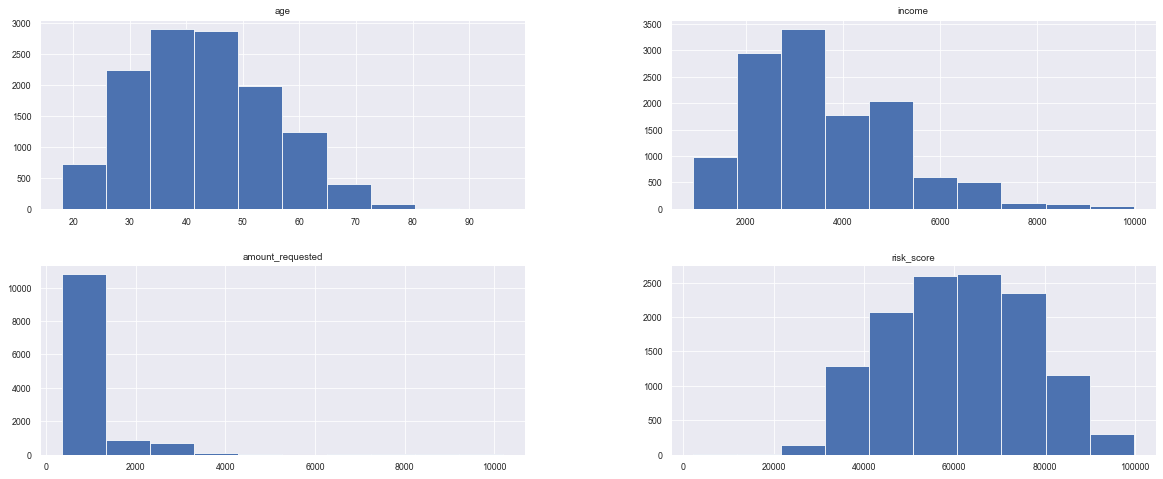

In [19]:
# creating a simple visualization of these numerical variables
num_vars.hist(figsize=(20, 8));

In [20]:
train.age.value_counts()

43    402
37    392
42    388
39    384
34    382
     ... 
86      2
96      1
83      1
89      1
87      1
Name: age, Length: 72, dtype: int64

### Quick Observations

- Most customers appear to be middle aged, as the mean age is 43 years.

In [21]:
# checking key columns for dulicate entries
train.Entry_id.duplicated().value_counts()

False    12510
True         6
Name: Entry_id, dtype: int64

### Issues

- duplicate entries in the Entry_id column
- The months_employed and years_employed columns should be merged into one.
- The 

### Cleaning

Before we commence cleaning, it is best to create a copy of the dataset upon which the cleaning will be done.

In [22]:
train_copy = train.copy()

#### 1. Duplicate entries in the Entry_id column

#### Define: The entry id column contains some duplicate entries that need to be dropped.

#### Code 

In [23]:
#test
sum(train_copy.Entry_id.duplicated())

6

In [24]:
train_copy.drop_duplicates(subset= 'Entry_id', inplace = True)

In [25]:
# confirmation 
sum(train_copy.Entry_id.duplicated())

0

#### 2. The months_employed and years_employed columns should be merged into 1

#### Define: The months_employed and years_employed columns should be merged to make it easier to work with them. This column will be represented in months

#### Code

In [33]:
# test
train_copy.sample(3)

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
8806,4545029,63,bi-weekly,0,4220,0,5,9,4,8,...,3100,85700,0.732344,0.848660,0.664430,0.667411,0.712388,0.412388,6,0
3208,2636355,35,weekly,0,5205,0,3,2,3,1,...,900,63000,0.748060,0.882239,0.722196,0.752083,0.580816,0.680816,11,0
3054,5604122,56,bi-weekly,0,2075,0,2,0,2,2,...,600,62500,0.588714,0.921564,0.488205,0.667612,0.777674,0.677674,5,0


In [28]:
train_copy['total_months_employed'] = (train_copy['years_employed']*12) + train_copy['months_employed']

In [34]:
# confirmation
train_copy.sample(3)

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,total_months_employed
12328,4417759,34,bi-weekly,0,2560,0,10,5,6,2,...,86000,0.734487,0.876594,0.838331,0.943895,0.713173,0.713173,3,1,120
2530,4422193,31,monthly,0,3130,0,2,0,3,3,...,61900,0.663225,0.864237,0.427233,0.614095,0.377773,0.377773,11,1,24
9929,8611218,28,semi-monthly,0,2785,0,2,4,7,2,...,56100,0.634571,0.855304,0.552783,0.763507,0.567187,0.767187,13,1,24


### Structure of the dataset

The train dataset intially contained 12,516 rows, and 21 columns. After assessing and cleaning the data, it now contains 12,510 rows and 21 columns.

## <u>Exploratory Data Analysis.

In this section of the project, we are going to be exploring multiple variables from the train dataset.

In [36]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12510 entries, 0 to 12515
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Entry_id               12510 non-null  int64  
 1   age                    12510 non-null  int64  
 2   pay_schedule           12510 non-null  object 
 3   home_owner             12510 non-null  int64  
 4   income                 12510 non-null  int64  
 5   months_employed        12510 non-null  int64  
 6   years_employed         12510 non-null  int64  
 7   current_address_year   12510 non-null  int64  
 8   personal_account_m     12510 non-null  int64  
 9   personal_account_y     12510 non-null  int64  
 10  has_debt               12510 non-null  int64  
 11  amount_requested       12510 non-null  int64  
 12  risk_score             12510 non-null  int64  
 13  risk_score_2           12510 non-null  float64
 14  risk_score_3           12510 non-null  float64
 15  ri

## Univariate Exploration

### Distribution of ages in the dataset.

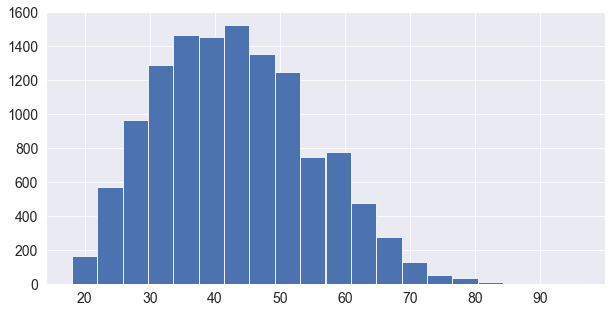

In [27]:
plt.figure(figsize=(10,5))
plt.hist(train.age, color = base_color, bins = 20);
plt.yticks(fontsize=14)
plt.xticks(fontsize=14);

The age distribution is slightly skewed right suggesting that there are more younger to middle aged customers i.e 20 to 40, than there are older customers i.e 50 to 90. 

To get a clearer picture of the distribution of ages, we will place them into age groups.

In [67]:
bins= [10,20,30,40,50,60,70,80]
labels = ['10-20','20-30','30-40','40-50','50-60', '60-70','70-80']
train_copy['age_group'] = pd.cut(train_copy['age'], bins=bins, labels=labels, right=False)
plt.figure(figsize=(10,8))

tick_props, tick_names, var_sum = prop_(train_copy.age_group)
sns.countplot(data=train_copy, x ='age_group', color=base_color);
plt.ylabel('Proportion')
plt.xlabel('Age Bracket', fontsize=12)
plt.yticks(tick_props * var_sum, tick_names, fontsize=11);
plt.xticks(fontsize=12);

NameError: name 'prop_' is not defined

<Figure size 720x576 with 0 Axes>

### Preferred payment schedule.

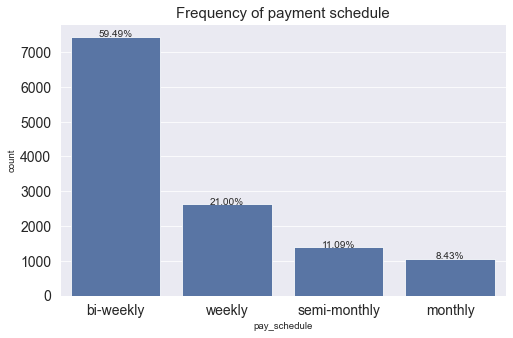

In [70]:
freq = train_copy['pay_schedule'].value_counts()
gen_order = freq.index

plt.figure(figsize=(8,5))
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

ax = sns.countplot(data = train_copy, x = 'pay_schedule', color = base_color, order = gen_order)
total = len(train_copy)
for p in ax.patches:
    tick_names = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(tick_names, (x, y), ha='center')

plt.title('Frequency of payment schedule', fontsize=15)
plt.show();

Most customers seem to opt for the bi-weekly payment schedule, 59.49% to be exact. The least preferred payment schedule is the monthly.